In [1]:
import read_data
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from pandas import DataFrame

In [2]:
dataframe = read_data.create_frame()

170


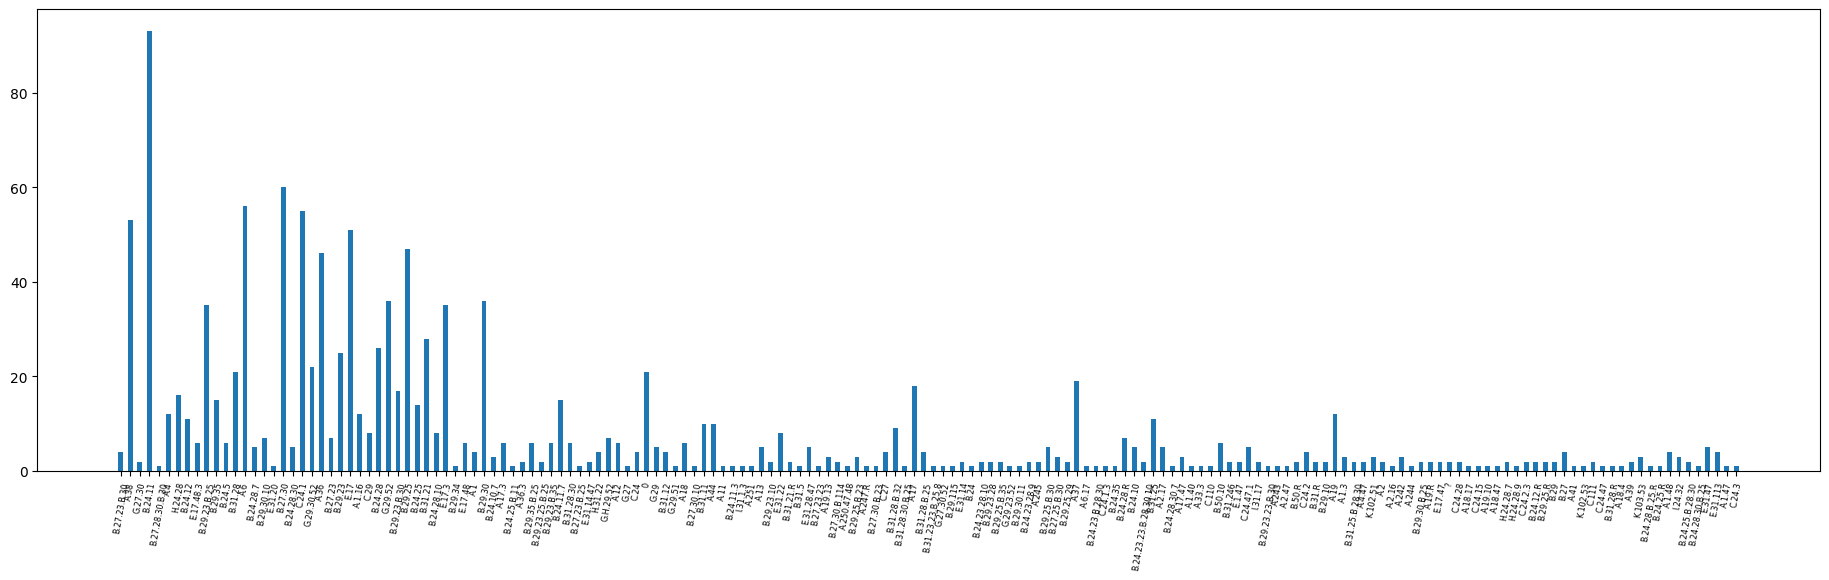

In [8]:
# count number of times each symbol appears

sequences = dataframe["sequence_values"]
symbols = []
for elem in sequences:
    symbols += elem

count = Counter(symbols)
plt.figure(figsize=(23, 6))
plt.xticks(rotation=80, size="xx-small")
plt.bar(count.keys(), count.values(), width=0.5)
print(len(count))
# we have 170 unique symbols

In [4]:
# get elements which only exist in one sequence
only_one = [elem for elem in count.keys() if count[elem] == 1]
only_one_dict = {}
data = []

for symbol in only_one:
    for i in range(len(dataframe)):
        entry = dataframe.iloc[i]
        if symbol in entry["sequence_values"]:
            only_one_dict[symbol] = entry
            data.append(entry)
            break

unique_df = DataFrame(data, columns=("object_name", "seq_name", "num_of_sequences", "sequence_len", "cycle", "sequence_values", "scenes"))

In [5]:
# investigate if there are any common factors between the sequences containing unique symbols

def check_has_scene(frame):

    counter = 0
    for i in range(len(frame)):
        entry = dataframe.iloc[i]
        if entry["scenes"][0] != "0":
            counter += 1
    
    return counter

unique_obj = unique_df.drop_duplicates('object_name')
print(f"{len(unique_df)} unique symbols appear on {len(unique_obj)} different objects out of {len(dataframe)} total.")
print(f"Of these different objects, {round(check_has_scene(unique_obj)/len(unique_obj), 3)}% contain scenes.")
temp = check_has_scene(dataframe.drop_duplicates('object_name'))/len(dataframe.drop_duplicates('object_name'))
print(f"Of all objects, {round(temp, 3)}% contain scenes.")

52 unique symbols appear on 36 different objects out of 255 total.
Of these different objects, 0.944% contain scenes.
Of all objects, 0.834% contain scenes.


In [6]:
# looking into whether "unique" scenes (contained by only 1 object) have a higher chance to contain "unique" symbols

scenes = dataframe["scenes"]
scene_individual = []
for elem in scenes:
    if elem[0] != '0':
        scene_individual += elem

count = Counter(scene_individual)
single_count = [elem for elem in count.keys() if count[elem] <= 2]
# scenes 2, 19, 20 only appear on one scene each
# 20 - EMB-VA28404
# 19 - MUNSA-0006691
# 2 - MKSL400
temp_names = []

for i in range(len(dataframe)):
        entry = dataframe.iloc[i]
        for elem in entry["scenes"]:
             if elem in single_count:
                temp_names.append(entry["object_name"])

for name in temp_names:
     if name in list(unique_df['object_name']):
          print(f"Object {name} contains a unique scene and symbol.")

# no unique symbols appear on objects with unique scenes - in each case, the scenes appear on one other object

'''
Jako że w jednym klastrze znajduje się zdecydowana większość znaków uszkodzonych (17/21). 
Sugeruje to, że pradawni Inkascy wandale ze szczególną okrutnością traktowali jeden znak, 
najczęściej gdy był on częścią szczególnej sekwencji.
'''
pass

Object EMB-VA8916 contains a unique scene and symbol.
Object MA7524 contains a unique scene and symbol.
Object MA7524 contains a unique scene and symbol.


In [7]:
avg_sequences_per_cup = sum(list(map(int, dataframe["num_of_sequences"])))/len(dataframe)
avg_sequences_per_cup

1.3058823529411765